In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
data.shape

(768, 9)

In [61]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [63]:
zero_features = ['BloodPressure','SkinThickness','Insulin','BMI','Glucose']

In [64]:
dm = data[zero_features].mean()

In [65]:
data[zero_features] = data[zero_features].replace(0,dm)

In [66]:
import seaborn as sns

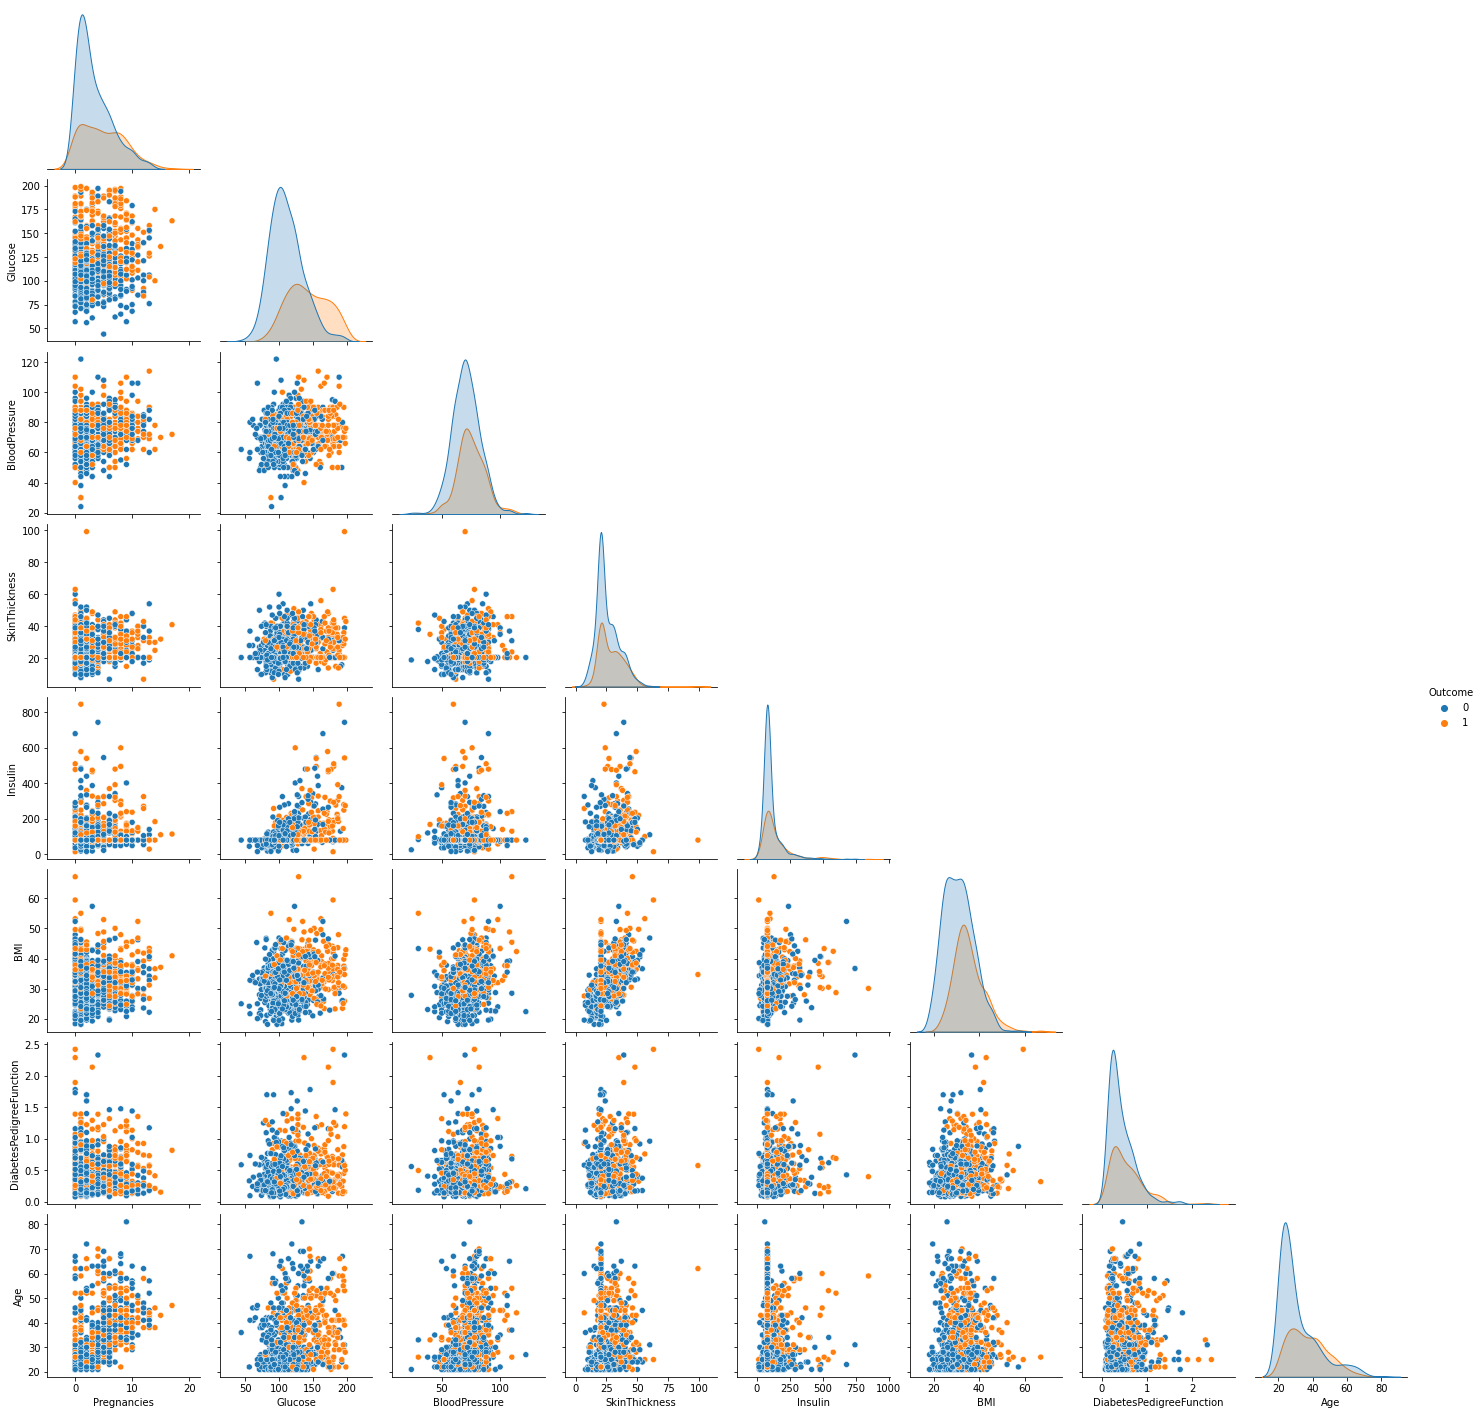

In [67]:
sns.pairplot(data,hue='Outcome',corner=True);

<AxesSubplot:>

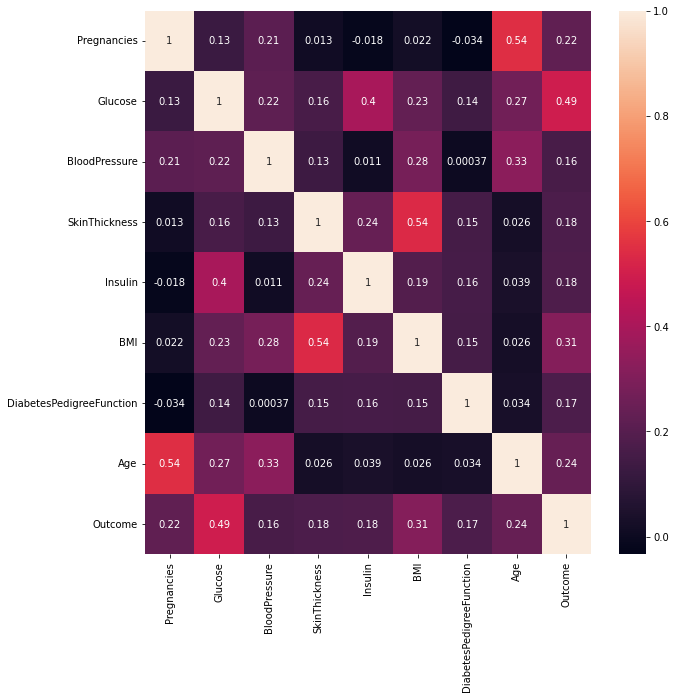

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:ylabel='Outcome'>

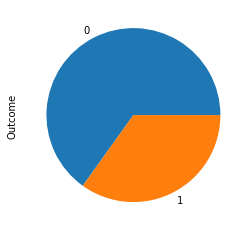

In [69]:
data['Outcome'].value_counts().plot(kind='pie')

In [70]:
X = data.iloc[:,:-1]
y = data['Outcome']

In [71]:
X.shape

(768, 8)

In [72]:
y.shape

(768,)

In [73]:
from sklearn.preprocessing import QuantileTransformer

In [74]:
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')
param_grid_svc = {'C':[0.001, 0.01, 0.1, 0.5, 1],'gamma':['scale', 'auto']}


grid_svc_model = GridSearchCV(svc, param_grid=param_grid_svc)



grid_svc_model.fit(scaled_X_test,y_test)

grid_svc_model.best_params_

{'C': 1, 'gamma': 'auto'}

In [80]:
model = grid_svc_model.predict(scaled_X_test)


In [86]:
model

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [82]:
accuracy_score(y_test,model)

0.922077922077922

In [83]:
import pickle

In [90]:
pickle.dump(model, open("diabetes1.pkl",'wb'))

In [91]:
import os
os.getcwd()

'C:\\Users\\91700\\Multi_Disease_Predictor-master\\Python Notebooks'